# Projeto 1 - Ciência dos dado

**Lais Nascimento da Silva | 2B engenharia**

**Pergunta**:
Analisando dados de países que são da Organização Internacional do Trabalho, observa-se uma queda maior da taxa de trabalho infantil, em países que tem infraentrutura para implementarem as políticas exigidas nas normas internacionais da OIT? A queda na taxa de trabalho infantil influência as taxas de alfabetização?

**Hipótese**:
A Organização Internacional do Trabalho (OIT), tem como um de seus principais objetivos erradicar o trabalho infantil, dessa maneira, a OIT age com o intuito de atingir esse objetivo, então motivam, na maioria das vezes, os países membros a adotarem a legislação que proíbe ou impõe severas restrições ao trabalho infantil . O trabalho infantil na maioria das vezes priva as crianças de frenquentar a escola e desse modo, menos crianças se alfabetizam. Portanto, a hipótese analisada será de que quando um país consegue colocara legislação em prática as taxas de trabalho infantil caem de maneira mais intensa e consequentemente as taxas de alfabetização aumentam, pois as crianças poderão frenquentar a escola regurlamente.

link OIT e trabalho infantil: 
https://www.ilo.org/brasilia/temas/trabalho-infantil/lang--pt/index.htm

https://www.ilo.org/global/docs/WCMS_714085/lang--en/index.htm

https://www.ilo.org/brasilia/temas/trabalho-infantil/WCMS_565224/lang--pt/index.htm



## Taxas de trabalho infantil, Taxas de analfabetização

Os dados foram tirados do site: https://www.gapminder.org/data/

## Leitura de dados:


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
import matplotlib.pyplot as plt

In [2]:
import os

os.getcwd()


'C:\\Users\\User\\Desktop\\2ºsemestre\\Ciência dos dados\\Projeto1_Ciencia_dos_Dados'

In [3]:
#Leitura dos arquivos em Excel
trab_inf= pd.read_excel('trab_infantil.xlsx')
alfab = pd.read_excel('alfabetizacao.xlsx')




### Tabela Taxas de trabalho infantil

A tabela apresenta as taxas de trabalho infantil em cada país entre os anos de 1994 e 2016

In [4]:
#Tabela de trabalho infantil nos países em cada ano

trab_inf.head(3)

,country,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,9.3,NaN,NaN,NaN,NaN,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,36.6,NaN,NaN,...,NaN,NaN,NaN,5.5,NaN,NaN,NaN,NaN,NaN,NaN
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.5,NaN,NaN,NaN


### Tabela Taxas de analfabetização

A tabela apresenta as taxas de analfabetização em vários países entre os 1970 e 2018

In [5]:
#tabela de taxa de analfabetização em cada país por ano

alfab.head(3)

,country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,NaN,NaN,NaN,NaN,72.9,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.30,13.70,12.800,9.530,5.63,3.84,4.400,4.340,2.940,NaN
2,Algeria,NaN,NaN,NaN,32.5,28.6,26.2,24.2,22.6,21.6,...,1.03,1.11,0.949,0.889,NaN,NaN,0.733,0.769,0.557,NaN


**Grupos Analisados**

Dentre os países que estão nas tabelas de taxa de trabalho infantil e taxa de analfabetização, a maioria está dentro do Organização, os poucos que não são membros, não têm dados suficientes para o estudo.
Portanto a separação será em dois grupos, divididos a partir de dados do relatório do OIT, a partir de informações referentes a pobreza e infraestrutura (indicada pela cobertura de saúde).
A seleção foi feita de acordo com o seguinte gráfico:

retatório: https://www.ilo.org/wcmsp5/groups/public/---dgreports/---dcomm/documents/publication/wcms_243961.pdf

<img src=referenciapaises.png width="650">

Os dados que serão analisados serão dos anos de 2006 e 2012, pois estavam faltando dados e esses dois anos estavam mais completos

# Análise dados de 2006

As listas a baixo separam os dois grupos que serão analisados para os países que estão na tabela de trabalho infantil, considerando os membros da OIT no ano 2006

In [6]:
TI_bons_2006=['Afghanistan', 'Angola', 'Argentina', 'Armenia', 'Bangladesh', 'Belarus', 'Bosnia and Herzegovina', 'Brazil', 'Chad', 'Chile', 'Colombia', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', 'Dominican Republic', 'Egypt', 'Gabon', 'Guinea', 'Haiti', 'Iraq', 'Jordan', 'Kazakhstan', 'Malawi', 'Mexico', 'Moldova', 'Morocco', 'Mozambique', 'Panama', 'Paraguay', 'Peru', 'Portugal', 'Romania', 'Serbia', 'Sierra Leone', 'Somalia', 'Sri Lanka', 'Tanzania', 'Thailand', 'Togo', 'Trinidad and Tobago', 'Timor-Leste', 'Tunisia', 'Turkey', 'Ukraine', 'Uruguay', 'Uzbekistan', 'Venezuela', 'Zimbabwe']
TI_ruins_2006=['Zambia', 'Azerbaijan', 'Algeria', 'Albania', 'Benin', 'Burundi', 'Bolivia', 'Burkina Faso', "Cote d'Ivoire", 'Cambodia', 'Cameroon', 'Central African Republic', 'El Salvador', 'Ecuador', 'Ethiopia', 'Ghana', 'Gambia', 'Georgia', 'Guinea-Bissau', 'Guatemala', 'Honduras', 'India', 'Indonesia', 'Jamaica', 'Kenya', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Mali', 'Mongolia', 'Mauritania', 'Nepal', 'Nicaragua', 'Niger', 'Nigeria', 'Philippines', 'Pakistan', 'Rwanda', 'Senegal','Sudan', 'South Africa', 'Tajikistan', 'Uganda', 'Namibia', 'Vietnam', 'Yemen']

In [7]:
trab_inf_idx = trab_inf.set_index('country')

In [8]:
trab_inf_idx_t =trab_inf_idx.T

In [9]:
trab_inf_sem_org = trab_inf_idx_t.iloc[:-1,:]

### Gráfico de Taxa de trabalho infanti e a média nos anos

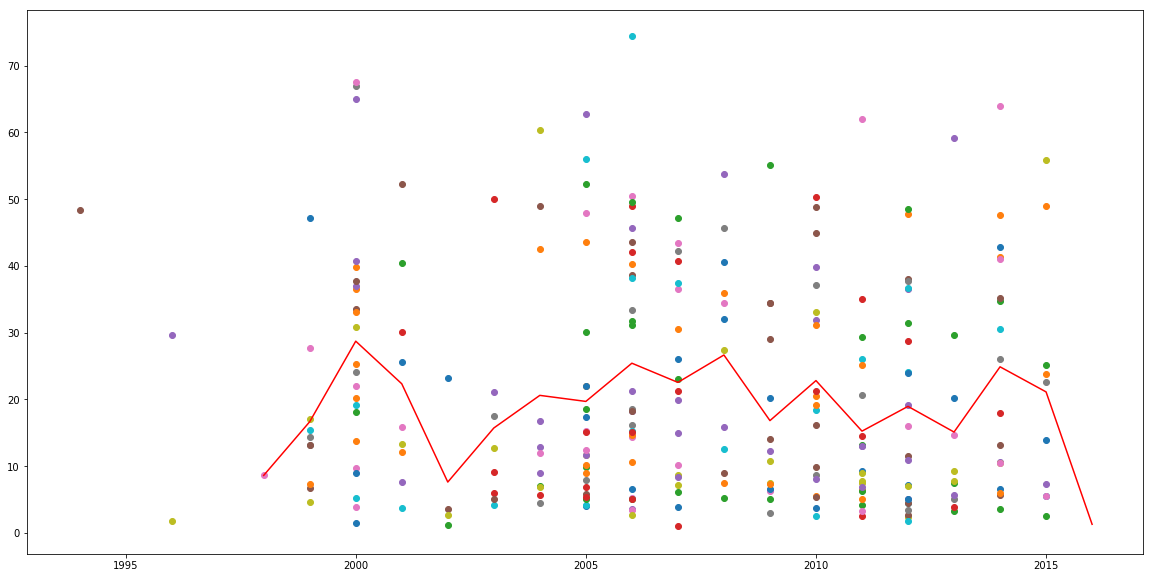

In [10]:
medias_trab_inf = trab_inf.mean()
plt.figure(figsize=(20,10))
for pais in trab_inf_sem_org.columns:
    plt.scatter(x=trab_inf_sem_org.index, y=trab_inf_sem_org[pais])
plt.plot(medias_trab_inf.index, medias_trab_inf , color="r")

**Análise**:
A tendência da taxa de trabalho infantil é cair com o tempo, porém percebe-se que mesmo com as medidas tomadas pela OIT, que contém muitos países membros, as taxas não tem quedas tão grandes e em alguns períodos voltam a ficar altas. Portanto, é possível verifcar que em países mesmo que pertencentes a Organização, as ações contra esse problema não são tão eficazes.
    



Nova coluna, sendo ela qualitativa:

Primeiro todos os países receberão o numero 0

In [11]:
trab_inf_idx.loc[:,"ORG"] = 0

Os países que estão na lista de países "bons" terão o valor de "ORG" igual a 1

In [12]:
trab_inf_idx.loc[TI_bons_2006, "ORG"] =1
TI=trab_inf_idx


Os países que estão na lista de países "ruin" terão o valor de "ORG igual a 2

In [13]:
trab_inf_idx.loc[TI_ruins_2006, "ORG"] =2
TI=trab_inf_idx

Portanto na coluna qualitativa "ORG" os países que tem o número 0 não estão na Organização Internacional do Trabalho, os que estão com 1 estão na organização e são países que tem condições de implementar medidas contra o trabalho infantil eficazes, já os que estão com numero 2 não têm infraestrutura para realizar medidas eficazes.

### Boxplot

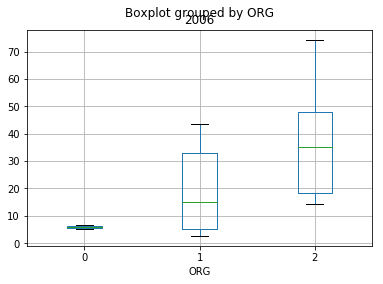

In [14]:
TI.boxplot([2006], by="ORG")

**Análise:**
Observando o gráfico é possivel notar que os países que estão na lista de menos favorecidos, tem a taxa de trabalho infantil, no ano de 2006, maior do que a de países que são com mais infraestrutura, mostrando que dentro da Organização há uma separação e onde há melhores condições as taxas são de fato menores, pois conseguem implementar politicas contra o trabalho infantil 

Tabela com os dados de trabalho infantil de países "bons" no ano de 2006

In [15]:
#Tabela de trabalho infantil apenas com os países que estão na OIT no ano de 2006
TI_org_bons_2006= TI.loc[(TI.ORG==1), [2006]]
TI_org_bons_2006.head(3)

,2006
country,
Afghanistan,NaN
Angola,NaN
Argentina,NaN


Tabela com os dados de trabalho infantil de países "ruins" no ano de 2006

In [16]:
#Tabela de trabalho infantil apenas com os países que estão na OIT no ano de 2006
TI_org_ruins_2006= TI.loc[(TI.ORG==2), [2006]]
TI_org_ruins_2006.head(3)

,2006
country,
Albania,NaN
Algeria,NaN
Azerbaijan,NaN


As listas abaixo separam os dois grupos que serão analisados para os os países que estão na tabela de taxa de analfabetização, considerando os membros da OIT no ano 2006

In [17]:
AF_bons_2006=['Afghanistan', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Botswana', 'Brazil', 'Bulgaria', 'Canada', 'Chad', 'Chile', 'China', 'Colombia', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Denmark', 'Dominica', 'Dominican Republic', 'Egypt', 'Estonia', 'Fiji', 'Finland', 'France', 'Gabon', 'Germany', 'Greece', 'Grenada', 'Guinea', 'Haiti', 'Hungary', 'Iceland', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Japan', 'Jordan', 'Kazakhstan', 'Kiribati', 'Kuwait', 'Latvia', 'Lebanon', 'Libya', 'Lithuania', 'Luxembourg', 'Malawi', 'Malaysia', 'Malta', 'Mauritius', 'Mexico', 'Moldova', 'Morocco', 'Montenegro', 'Mozambique', 'Myanmar', 'Netherlands', 'New Zealand', 'Norway', 'Oman', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia', 'San Marino', 'Sao Tome and Principe', 'Samoa', 'Saudi Arabia', 'Serbia', 'Seychelles', 'Sierra Leone', 'Singapore', 'Slovenia', 'South Africa', 'Solomon Islands', 'Spain', 'Sri Lanka', 'Suriname', 'Sweden', 'Tanzania', 'Thailand', 'Togo', 'Timor-Leste', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Ukraine', 'United Arab Emirates', 'United Kingdom', 'United States', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Zimbabwe']
AF_ruins_2006=['Zambia', 'Azerbaijan', 'Albania', 'Benin', 'Burundi', 'Bolivia', 'Burkina Faso', "Cote d'Ivoire", 'Comoros', 'Cambodia', 'Cameroon', 'Central African Republic', 'El Salvador', 'Ecuador', 'Ethiopia', 'Ghana', 'Gambia', 'Georgia', 'Guatemala', 'Honduras', 'India', 'Indonesia', 'Jamaica', 'Kenya', 'Lao', 'Lesotho', 'Liberia',  'Madagascar', 'Mongolia', 'Mauritania',  'Mali', 'Nepal', 'Nicaragua', 'Nigeria', 'Niger', 'Philippines', 'Pakistan', 'Rwanda', 'Senegal','Sudan', 'Switzerland', 'Tajikistan', 'Uganda', 'Namibia', 'Vietnam', 'Yemen', 'Djibouti', 'Equatorial Guinea', 'Eritrea', 'Guinea-Bissau']

In [18]:
alfab_idx = alfab.set_index('country')

In [19]:
alfab_idx_t =alfab_idx.T

In [20]:
alfab_sem_org = alfab_idx_t.iloc[:-1,:]

### Gráfico de taxa de analfabetização e médias nos anos

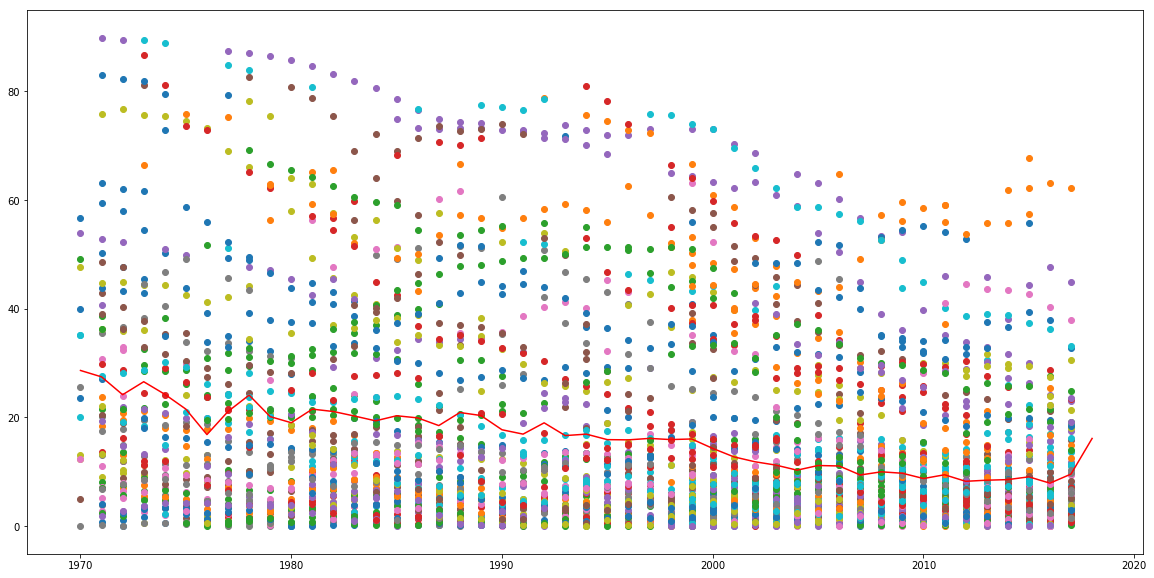

In [21]:
medias_alfab= alfab.mean()
plt.figure(figsize=(20,10))
for pais in alfab_sem_org.columns:
    plt.scatter(x=alfab_sem_org.index, y=alfab_sem_org[pais])
plt.plot(medias_alfab.index, medias_alfab , color="r")

**Análise:**
Observando os gráfico é possível perceber que o analfabetismo, em média, está diminuindo com o passar do tempo, no entanto, ainda é bem alto em vários países. Com a falta de eficiência no combate a exploração de mão de obra infantil em muitos lugares, menos crianças têm oportunidade de se alfabetizarem.

A mesma separação qualitativa de países foi feita com a tabela de taxa de alfabetização

In [22]:
alfab_idx.loc[:,"ORG"] = 0

In [23]:
alfab_idx.loc[AF_bons_2006, "ORG"] =1
AF=alfab_idx

In [24]:
alfab_idx.loc[AF_ruins_2006, "ORG"] =2
AF=alfab_idx

Os países foram divididos em os que etsão fora da OIT (0), os que estão dentro da OIT e tem mais infraesturura (1) e os que t~em menos infraestrutura (2)

### Boxplot 

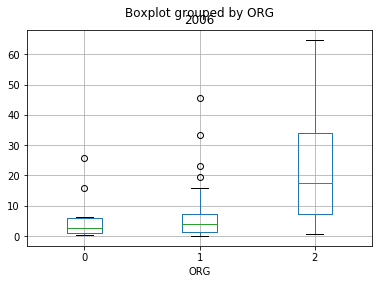

In [25]:
AF.boxplot([2006], by="ORG")

**Análise:**
É possíves perceber pelo Boxplot que a mediana que representa as taxas de analfabetismo, nos países mais desenvolvidos está mais baixa e nos países com mais dificuldades está mais alta, mostrando que nestes lugares há mais pessoas que não tiveram a chance de aprenderem a ler e escrever.

Tabela com os dados de alfabetização de países "bons" no ano de 2006

In [26]:
#Tabela de taxa de alfabetização de 2006 apenas com os membros da OIT
AF_org_bons_2006= AF.loc[(AF.ORG==1), [2006]]
AF_org_bons_2006.head(3)

,2006
country,
Afghanistan,NaN
Algeria,4.32
Angola,NaN


In [27]:
AF_org_bons_2006.max()

2006    45.4
dtype: float64

Tabela com os dados de alfabetização de países "ruins" no ano de 2006

In [28]:
#Tabela de taxa de alfabetização de 2006 apenas com os paises não membros da OIT
AF_org_ruins_2006= AF.loc[(AF.ORG==2), [2006]]
AF_org_ruins_2006.head(3)

,2006
country,
Albania,NaN
Azerbaijan,16.2
Benin,13.2


## Inner Join

Os dados de países dentro da lista "bons" de trabalho infantil e analfabetização do ano de 2006 foram unidos na mesma tabela

In [29]:
#juntando as taxas de alfabetização e trabalho infantil dos "bons"
tral_bom = TI_org_bons_2006.join(AF_org_bons_2006, how='inner', lsuffix='_trab_inf', rsuffix='_alfab')
tral_bom.head(3)

,2006_trab_inf,2006_alfab
country,,
Afghanistan,NaN,NaN
Angola,NaN,NaN
Argentina,NaN,0.529


## Gráfico de Trabalho infantil x Alfabetização

Para países da categoria "bons"

Text(0, 0.5, 'Analfabetismo')

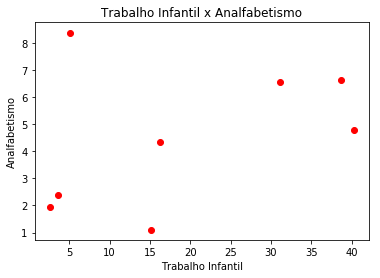

In [30]:
plt.scatter(tral_bom["2006_trab_inf"], tral_bom['2006_alfab'], color='r')
plt.title('Trabalho Infantil x Analfabetismo')
plt.xlabel('Trabalho Infantil')
plt.ylabel('Analfabetismo')


**Análise:**
Nos países com mais infraestrutura as taxas de analfabetismos são menos e em maioria os pontos que demonstram taxas altas de trabalho infantil tambem mostram taxas mais altas de analfabetismo.



Os dados de países dentro da lista "ruin" de trabalho infantil e analfabetismo do ano de 2006 foram unidos na mesma tabela

In [31]:
tral_ruim = TI_org_ruins_2006.join(AF_org_ruins_2006, how='inner', lsuffix='_trab_inf', rsuffix='_alfab')
tral_ruim.head()

,2006_trab_inf,2006_alfab
country,,
Albania,NaN,NaN
Azerbaijan,NaN,16.20
Benin,74.4,13.20
Bolivia,NaN,3.06
Burkina Faso,42.1,50.40


**Gráfico de Trabalho infantil x Alfabetização**

Para países da categoria "ruins"

Text(0, 0.5, 'Analfabetismo')

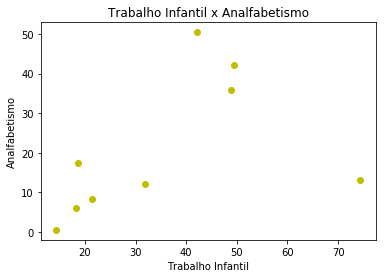

In [32]:
plt.scatter(tral_ruim["2006_trab_inf"], tral_ruim['2006_alfab'], color='y')
plt.title('Trabalho Infantil x Analfabetismo')
plt.xlabel('Trabalho Infantil')
plt.ylabel('Analfabetismo')

**Análise:**
Nos países menos favorecidos as taxas de trabalho infantil e analfabetismo são mais elevadas e em sua maioria quanto mais alta taxa de trabalho infantil, mais alta de quantidade de pessoas analfabetas

# Análise dados de 2012


Entre 2006 e 2012 mais países entraram na organização

As listas de separação de países foram atualizadas, contendo todod os países pertencentes a organização em 2012

In [33]:
TI_bons_2012=['Afghanistan', 'Angola', 'Argentina', 'Armenia', 'Bangladesh', 'Belarus', 'Bosnia and Herzegovina', 'Brazil', 'Chad', 'Chile', 'Colombia', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', 'Dominican Republic', 'Egypt', 'Gabon', 'Guinea', 'Haiti', 'Iraq', 'Jordan', 'Kazakhstan', 'Malawi', 'Mexico', 'Moldova', 'Morocco', 'Mozambique', 'Panama', 'Paraguay', 'Peru', 'Portugal', 'Romania', 'Serbia', 'Sierra Leone', 'Somalia', 'Sri Lanka', 'Tanzania', 'Thailand', 'Togo', 'Trinidad and Tobago', 'Timor-Leste', 'Tunisia', 'Turkey', 'Ukraine', 'Uruguay', 'Uzbekistan', 'Venezuela', 'Zimbabwe']
TI_ruins_2012=['Zambia', 'Azerbaijan', 'Algeria', 'Albania', 'Benin', 'Burundi', 'Bolivia', 'Burkina Faso', "Cote d'Ivoire", 'Cambodia', 'Cameroon', 'Central African Republic', 'El Salvador', 'Ecuador', 'Ethiopia', 'Ghana', 'Gambia', 'Georgia', 'Guatemala', 'Guinea-Bissau', 'Honduras', 'India', 'Indonesia', 'Jamaica', 'Kenya', 'Lao', 'Lesotho', 'Liberia', 'Mali', 'Madagascar', 'Mongolia', 'Mauritania', 'Nepal', 'Nicaragua', 'Nigeria', 'Niger', 'Philippines', 'Pakistan', 'Rwanda', 'Senegal','Sudan', 'South Africa', 'South Sudan', 'Tajikistan', 'Uganda', 'Namibia', 'Vietnam', 'Yemen']

A separação na coluna qualitativa foi disposta da mesma maneira:

In [34]:
trab_inf_idx.loc[TI_bons_2012, "ORG"] =1
TI_2012=trab_inf_idx

In [35]:
trab_inf_idx.loc[TI_ruins_2012, "ORG"] =2
TI_2012=trab_inf_idx

### Boxplot

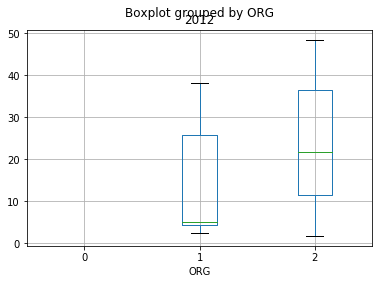

In [36]:
TI_2012.boxplot([2012], by="ORG")

**Análise:**
Com o boxplot é possível verificar que as taxas de trabalho infantil de ambos os grupos diminuiram, no entanto ainda há uma grande diferença entre os países a categoria 1 e 2.

Tabela com os dados de trabalho infantil de países "bons" no ano de 2012


In [37]:
TI_org_bons_2012= TI_2012.loc[(TI_2012.ORG==1), [2012]]
TI_org_bons_2012.head(3)

,2012
country,
Afghanistan,NaN
Angola,NaN
Argentina,5.03


Tabela com os dados de trabalho infantil de países "ruins" no ano de 2012

In [38]:
TI_org_ruins_2012= TI_2012.loc[(TI_2012.ORG==2), [2012]]
TI_org_ruins_2012.head(3)

,2012
country,
Albania,NaN
Algeria,NaN
Azerbaijan,NaN


In [39]:
AF_bons_2012=['Afghanistan', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Botswana', 'Brazil', 'Bulgaria', 'Brunei', 'Canada', 'Chad', 'Chile', 'China', 'Colombia', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Denmark', 'Dominica', 'Dominican Republic', 'Egypt', 'Estonia', 'Fiji', 'Finland', 'France', 'Gabon', 'Germany', 'Greece', 'Grenada', 'Guinea','Haiti', 'Hungary', 'Iceland', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Japan', 'Jordan', 'Kazakhstan', 'Kiribati', 'Kuwait', 'Latvia', 'Lebanon', 'Libya', 'Lithuania', 'Luxembourg', 'Malawi', 'Malaysia', 'Malta', 'Mauritius', 'Mexico', 'Moldova', 'Morocco', 'Montenegro', 'Marshall Islands', 'Mozambique', 'Myanmar', 'Netherlands', 'New Zealand', 'Norway', 'Oman', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia', 'San Marino', 'Sao Tome and Principe', 'Samoa', 'Saudi Arabia', 'Serbia', 'Seychelles', 'Sierra Leone', 'Singapore', 'Slovenia', 'South Africa', 'Solomon Islands', 'Spain', 'Sri Lanka', 'Suriname', 'Sweden', 'Tanzania', 'Thailand', 'Togo', 'Timor-Leste', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Tuvalu', 'Ukraine', 'United Arab Emirates', 'United Kingdom', 'United States', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Zimbabwe']
AF_ruins_2012=['Zambia', 'Azerbaijan', 'Albania', 'Benin', 'Burundi', 'Bolivia', 'Burkina Faso', "Cote d'Ivoire", 'Comoros', 'Cambodia', 'Cameroon', 'El Salvador', 'Ecuador', 'Ethiopia', 'Ghana', 'Gambia', 'Georgia', 'Guatemala', 'Honduras', 'India', 'Indonesia', 'Jamaica', 'Kenya', 'Lao', 'Lesotho', 'Liberia', 'Central African Republic',  'Madagascar', 'Maldives', 'Mongolia', 'Mauritania', 'Mali', 'Nepal', 'Nicaragua', 'Nigeria', 'Niger', 'Philippines', 'Pakistan', 'Rwanda', 'Senegal','Sudan', 'Switzerland', 'Tajikistan', 'Uganda', 'Namibia', 'Vietnam', 'Yemen', 'Djibouti', 'Eritrea', 'Equatorial Guinea', 'Guinea-Bissau', ]

In [40]:
alfab_idx.loc[AF_bons_2012, "ORG"] =1
AF_2012=alfab_idx

In [41]:
alfab_idx.loc[AF_ruins_2012, "ORG"] =2
AF_2012=alfab_idx

### Boxplot

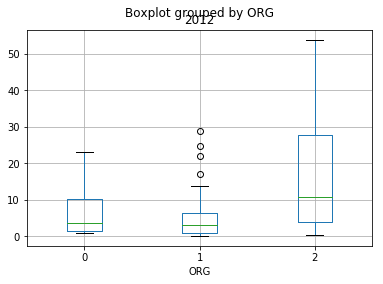

In [42]:
AF_2012.boxplot([2012], by="ORG")

**Análise:**
As taxas de analfabetização também diminuiram, porém a diferença continua.

    

Tabela com os dados de alfabetização de países "bons" no ano de 2012

In [43]:
AF_org_bons_2012= AF_2012.loc[(AF_2012.ORG==1), [2012]]
AF_org_bons_2012.head(3)

,2012
country,
Afghanistan,NaN
Algeria,0.889
Angola,NaN


Tabela com os dados de alfabetização de países "ruins" no ano de 2012

In [44]:
AF_org_ruins_2012= AF_2012.loc[(AF_2012.ORG==2), [2012]]
AF_org_ruins_2012.head(3)

,2012
country,
Albania,9.53
Azerbaijan,10.70
Benin,4.49


## Inner Join

Os dados de países dentro da lista "bons" de trabalho infantil e analfabetismo do ano de 2012 foram unidos na mesma tabela

In [45]:
tral_bom_2012 = TI_org_bons_2012.join(AF_org_bons_2012, how='inner', lsuffix='_trab_inf', rsuffix='_alfab')
tral_bom_2012.head()

,2012_trab_inf,2012_alfab
country,,
Afghanistan,NaN,NaN
Angola,NaN,NaN
Argentina,5.03,0.813
Armenia,NaN,3.570
Bangladesh,NaN,NaN


Text(0, 0.5, 'Analfabetismo')

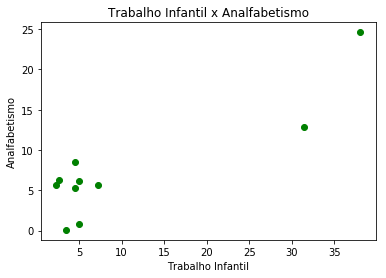

In [46]:
plt.scatter(tral_bom_2012["2012_trab_inf"], tral_bom_2012['2012_alfab'], color='g')
plt.title('Trabalho Infantil x Analfabetismo')
plt.xlabel('Trabalho Infantil')
plt.ylabel('Analfabetismo')

**Análise:**
As taxas em sua maioria diminuiram, tanto as de analfabetismo, quanto as de trabalho infantil

In [47]:
tral_ruim_2012 = TI_org_ruins_2012.join(AF_org_ruins_2012, how='inner', lsuffix='_trab_inf', rsuffix='_alfab')
tral_ruim_2012.head()

,2012_trab_inf,2012_alfab
country,,
Albania,NaN,9.53
Azerbaijan,NaN,10.70
Benin,24.1,4.49
Bolivia,NaN,10.10
Burkina Faso,NaN,33.90


Text(0, 0.5, 'Analfabetismo')

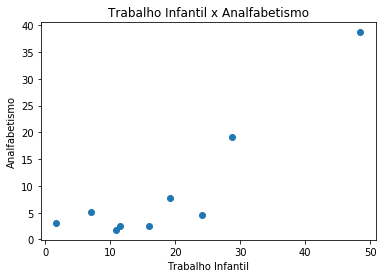

In [48]:
plt.scatter(tral_ruim_2012["2012_trab_inf"], tral_ruim_2012['2012_alfab'])
plt.title('Trabalho Infantil x Analfabetismo')
plt.xlabel('Trabalho Infantil')
plt.ylabel('Analfabetismo')

**Análise:**
Os pontos mostram que que as taxas se relacionam

Juntando os gráficos para realizar analises:

Países bons e ruins- ano 2006:

Ajuste linear entre Taxa de trabalho infantil e traxa de analfabetismos:
Coeficiente linear: 6.701013168204913
Coeficiente angular: 0.071905026189876
Ajuste linear entre Taxa de trabalho infantil e traxa de analfabetismos:
Coeficiente linear: 3.32985807203222
Coeficiente angular: 0.5211272385560249


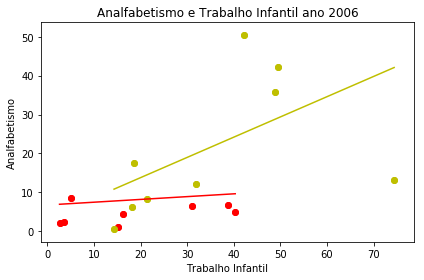

In [49]:
def reta_2006(dados_x, dados_y, c):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()

    print('Ajuste linear entre Taxa de trabalho infantil e traxa de analfabetismos:')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)
    plt.scatter(dados_x, dados_y, c=c, alpha=0.8)
    plt.title('Analfabetismo e Trabalho Infantil ano 2006')
    plt.xlabel('Trabalho Infantil')
    plt.ylabel('Analfabetismo')

    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color=c)

    plt.tight_layout()

plt.scatter(tral_bom["2006_trab_inf"], tral_bom['2006_alfab'], color='r')
reta_2006(tral_bom["2006_trab_inf"], tral_bom['2006_alfab'], 'r')
plt.scatter(tral_ruim["2006_trab_inf"], tral_ruim['2006_alfab'], color='y')
reta_2006(tral_ruim["2006_trab_inf"], tral_ruim['2006_alfab'], 'y')


Ajuste linear entre Taxa de trabalho infantil e traxa de analfabetismos:
Coeficiente linear: 1.4654299844212773
Coeficiente angular: 0.37788319121764624
Ajuste linear entre Taxa de trabalho infantil e traxa de analfabetismos:
Coeficiente linear: -0.33201146822290895
Coeficiente angular: 0.625832689151986


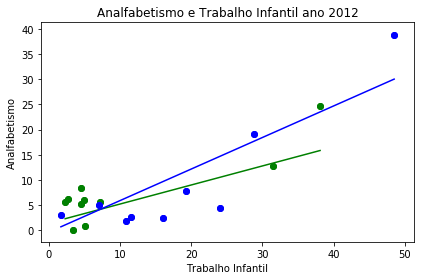

In [50]:
def reta_2012(dados_x, dados_y, c):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()

    print('Ajuste linear entre Taxa de trabalho infantil e traxa de analfabetismos:')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)
    plt.scatter(dados_x, dados_y, c=c, alpha=0.8)
    plt.title('Analfabetismo e Trabalho Infantil ano 2012')
    plt.xlabel('Trabalho Infantil')
    plt.ylabel('Analfabetismo')

    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color=c)

    plt.tight_layout()

plt.scatter(tral_bom_2012["2012_trab_inf"], tral_bom_2012['2012_alfab'], color='g')
reta_2012(tral_bom_2012["2012_trab_inf"], tral_bom_2012['2012_alfab'], 'g')
plt.scatter(tral_ruim_2012["2012_trab_inf"], tral_ruim_2012['2012_alfab'], color='b')
reta_2012(tral_ruim_2012["2012_trab_inf"], tral_ruim_2012['2012_alfab'], 'b')
    


# Conclusão

A partir dos gráficos plotados nesse documento, principalmente dos dois últimos, é perceptível que a hipótese se confirma. Pois no gráfico "Analfabetismo e Trabalho Infantil ano 2006", mostra que a reta que tem como base os pontos de taxa de trabalho infantil por analfabetismo de países pertencentes ao grupo que tem infraestrutura para colocar em prática legislação de combate ao trabalho infantil (reta vermelha), tem como coeficiente angular um número muito pequeno, aproximadamente 0,072, e vai até um certa parte do gráfico, mostrando no eixo y a pequena porcentagem de analfabetos e no eixo x menos crianças trabalhando, ao mesmo que tempo que a reta países com baixa infraestrutura, que não conseguem tratar com eficácia o problema da exploração da mão de obra infantil (reta amarela) tem um coeficiente angula elevado, aproximadamente 0,52, e mostra sua projeção em x e pontos de valores maiores, indicando que nesses países há bastante trabalho infantil e alto índice de analfabetos. No gráfico "Analfabetismo e Trabalho Infantil ano 2012" os resultados são semelhantes além de as taxas terem diminuído, pois mesmo com as dificuldades que muitos países enfrentam, a Organização Internacional do Trabalho age de maneira a combater o trabalho infantil, então as porcentagens dos dados estão menores, mas o coeficientes da reta de países mais desenvolvidos é menor, aproximadamente 0,38, enquanto o de países menos desenvolvidos atinge taxas maiores com o coeficiente angular de 0,63. Assim, conclui-se que de fato há uma relação entre as taxas de analfabetismo e trabalho infantil, visto que nos dois gráficos, para ambos os grupos, quanto maior a taxa de trabalho infantil maior é a taxa de analfabetismo e onde a se combate esse problema permitindo que as crianças possam estudar e possam se alfabetizar, a taxa de pessoas que não sabem ler e escrever é ainda menor.

**Referêcias:**
    
 https://www.ilo.org/brasilia/temas/trabalho-infantil/lang--pt/index.htm
 
 https://www.ilo.org/global/docs/WCMS_714085/lang--en/index.htm
 
 https://www.ilo.org/brasilia/temas/trabalho-infantil/WCMS_565224/lang--pt/index.htm
 
 https://www.gapminder.org/data/
 
 https://www.ilo.org/dyn/normlex/en/f?p=NORMLEXPUB:11003:0::NO:::
 
 https://www.ilo.org/wcmsp5/groups/public/---dgreports/---dcomm/documents/publication/wcms_243961.pdf
 
 